# <center> Netflix Stock Moving Average Trading Strategy <center>

This project aims to build a Simple Moving Average trading strategy on Netflix stock. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
NFLX = pd.read_csv('NETFLIX.csv')
NFLX

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4629,2020-10-12,548.809998,551.809998,538.239990,539.809998,539.809998,5391100
4630,2020-10-13,540.559998,557.650024,537.200012,554.090027,554.090027,5602500
4631,2020-10-14,562.609985,572.489990,541.000000,541.450012,541.450012,9510100
4632,2020-10-15,545.520020,551.219971,535.099976,541.940002,541.940002,5113100


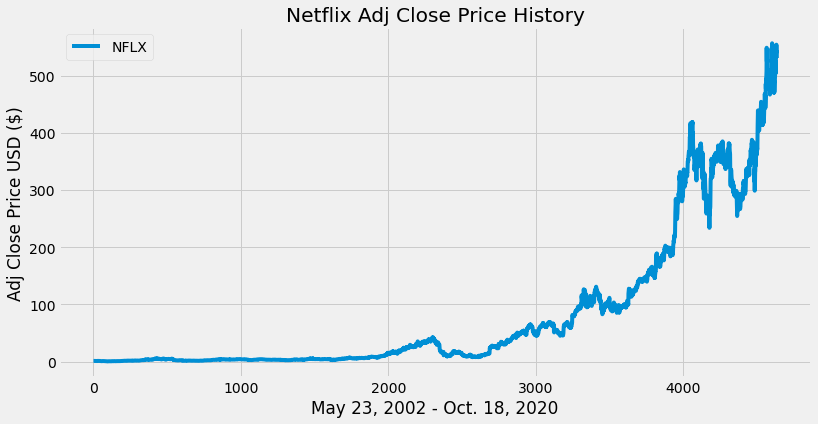

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(NFLX['Adj Close'], label = 'NFLX')
plt.title('Netflix Adj Close Price History')
plt.xlabel('May 23, 2002 - Oct. 18, 2020')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [5]:
# Create simple moving average with 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = NFLX['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4629,504.632332
4630,505.450000
4631,504.946667
4632,504.583333


In [6]:
# Create simple moving average with 100 day window
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = NFLX['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4629,482.463601
4630,483.642001
4631,484.763301
4632,486.035001


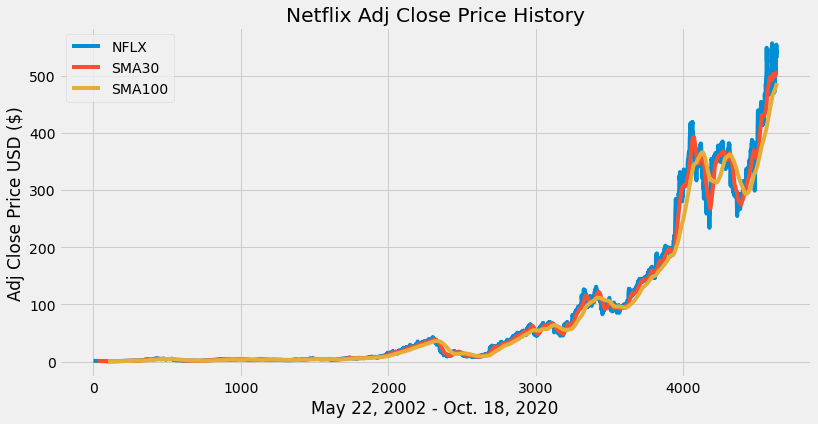

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(NFLX['Adj Close'], label = 'NFLX')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Netflix Adj Close Price History')
plt.xlabel('May 22, 2002 - Oct. 18, 2020')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
data = pd.DataFrame()
data['NFLX'] = NFLX['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,NFLX,SMA30,SMA100
0,1.196429,NaN,NaN
1,1.210000,NaN,NaN
2,1.157143,NaN,NaN
3,1.103571,NaN,NaN
4,1.071429,NaN,NaN
...,...,...,...
4629,539.809998,504.632332,482.463601
4630,554.090027,505.450000,483.642001
4631,541.450012,504.946667,484.763301
4632,541.940002,504.583333,486.035001


In [11]:
# Create buy and sell signals
def buy_sell(data) : 
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)) : 
    if data['SMA30'][i] > data['SMA100'][i] : 
      if flag != 1 : 
        sigPriceBuy.append(data['NFLX'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else : 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i] : 
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['NFLX'][i])
        flag = 0
      else : 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [12]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [13]:
data

,NFLX,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,1.196429,NaN,NaN,NaN,NaN
1,1.210000,NaN,NaN,NaN,NaN
2,1.157143,NaN,NaN,NaN,NaN
3,1.103571,NaN,NaN,NaN,NaN
4,1.071429,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4629,539.809998,504.632332,482.463601,NaN,NaN
4630,554.090027,505.450000,483.642001,NaN,NaN
4631,541.450012,504.946667,484.763301,NaN,NaN
4632,541.940002,504.583333,486.035001,NaN,NaN


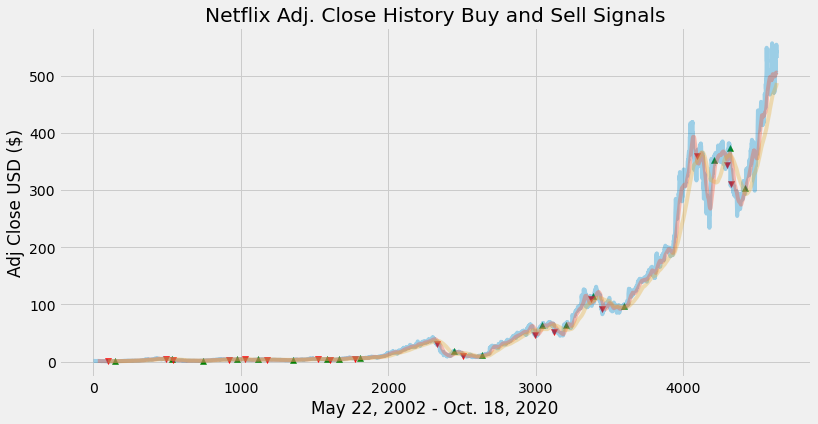

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(data['NFLX'], label = 'NFLX', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Netflix Adj. Close History Buy and Sell Signals')
plt.xlabel('May 22, 2002 - Oct. 18, 2020')
plt.ylabel('Adj Close USD ($)')
plt.show()